<a href="https://colab.research.google.com/github/ucfilho/ANN/blob/master/ANN_2022/Image_08/Class_008_object_detection_004_find_orange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
from skimage import feature
from skimage import measure
from PIL import Image
import numpy as np
import pandas as pd
import os 
import cv2
import re, random

from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import random

In [ ]:
!gdown --id 177aqTja9o3ZcM-CY5G2UmR3gvyuBcCG8


Downloading...
From: https://drive.google.com/uc?id=177aqTja9o3ZcM-CY5G2UmR3gvyuBcCG8
To: /content/teste fundo preto.zip
150MB [00:01, 123MB/s] 


In [ ]:
import zipfile
file_name = zipfile.ZipFile('teste fundo preto.zip', 'r')
file_name.extractall()

In [ ]:

FILE='teste fundo preto.zip'
img_name=[] 
x_original = [] 
x_gray = [] 
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)
        x_original.append(cv2.resize(cv2.imread(name),(60,80))) 
        x_gray.append(cv2.resize(cv2.imread(name,0),(60,80)))

Text(0.5, 1.0, '2b.png')

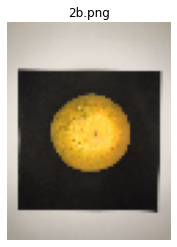

In [ ]:
Ind = 5
img= x_original[Ind]
plt.axis("off")
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.title(img_name[Ind])

In [ ]:
# https://www.pyimagesearch.com/2014/07/21/detecting-circles-images-using-opencv-hough-circles/

In [ ]:
gray = x_gray[0]


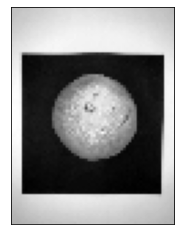

In [ ]:
r = gray

# Find contours at a constant value of 0.8
contours = measure.find_contours(r, 0.4)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(r, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=10)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()




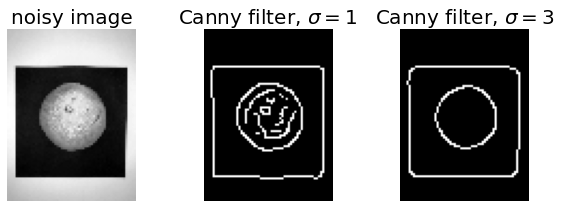

In [ ]:
im = gray
# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title(r'Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

In [ ]:
nrows,ncols =edges2.shape
Foto = np.ones((nrows,ncols))*255
for i in range(nrows):
  for j in range(ncols):
    if edges2[i,j] == True:
      Foto[i,j]=0


In [ ]:
Foto = Foto.astype(int)

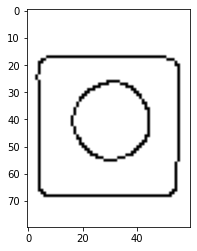

In [ ]:
plt.imshow(Foto, cmap=plt.cm.gray)

In [ ]:
# calculo do raio horizontal
Quadrado = []
Raio = []
for i in range(nrows):
  values = np.zeros(4)
  k = -1
  for j in range(1,ncols):
    if(Foto[i,j-1]==255 and Foto[i,j]==0):
      if(k<4):
        k = k+1
        values[k]=j
  L = values[3] - values[0]
  d = values[2] - values[1]
  Quadrado.append(L)
  Raio.append(d)

L = np.array(Quadrado).max()
print(L)
Raio = np.array(Raio).max()
print(Raio)

medida = Raio/L*14.5
print('raio horizontal=',medida)


51.0
28.0
raio horizontal= 7.960784313725491


In [ ]:
for i in Quadrado:
  if(i > 0):
    print(i)

51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0


In [ ]:
L = np.array(Quadrado).max()
print(L)
Raio = np.array(Raio).max()
print(Raio)

51.0
28.0


In [ ]:
medida = Raio/L*14.5
print('Medida=',medida)

Medida= 7.960784313725491


In [ ]:
print(Quadrado)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.0, -5.0, -4.0, -4.0, -4.0, -4.0, -4.0, -3.0, -3.0, -4.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -5.0, -6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
print(Raio)

28.0


In [ ]:
nrows,ncols =edges2.shape
# calculo do raio vertical
Quadrado = []
Raio = []
for j in range(ncols):
  values = np.zeros(4)
  k = -1
  for i in range(1,nrows): 
    if(Foto[i-1,j]==255 and Foto[i,j]==0):
      if(k<4):
        k = k+1
        values[k]=i
  L = values[3] - values[0]
  d = values[2] - values[1]
  Quadrado.append(L)
  Raio.append(d)

L = np.array(Quadrado).max()
print(L)
Raio = np.array(Raio).max()
print(Raio)

medida = Raio/L*14.5
print('raio vertical=',medida)

51.0
32.0
raio vertical= 9.098039215686274


In [ ]:
nrows

80

In [ ]:
for i in Quadrado:
  if(i > 0):
    print(i)

51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
